In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Math, Latex # for latex equation
from IPython.core.display import Image # for displaying Image

In [2]:
import seaborn as sns

sns.set(color_codes=True)

sns.set(rc={'figure.figsize' : (5,5)})

# Uniform Distribution

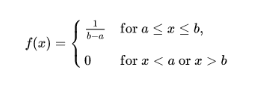

In [3]:
from scipy.stats import uniform

In [4]:
n = 10000
start = 10
width = 20

data_uniform = uniform.rvs(size=n, loc=start, scale=width)

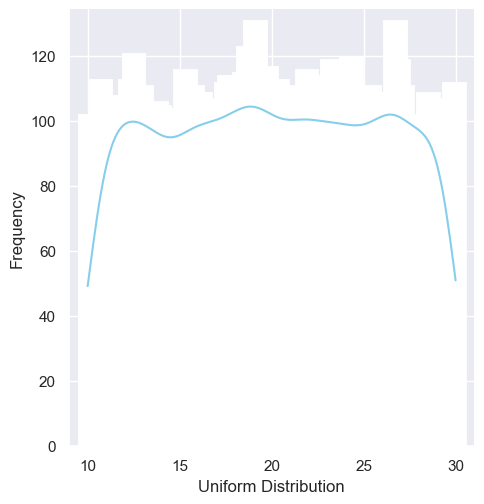

In [5]:
ax = sns.displot(data_uniform,
                 bins=100,
                 kde=True,
                 color='skyblue',
                 linewidth=15,
                 alpha=1
                )

ax.set(xlabel='Uniform Distribution', ylabel='Frequency')

# Normal Distribution

In [6]:
from scipy.stats import norm

data_normal = norm.rvs(size=10000, loc=0, scale=1)

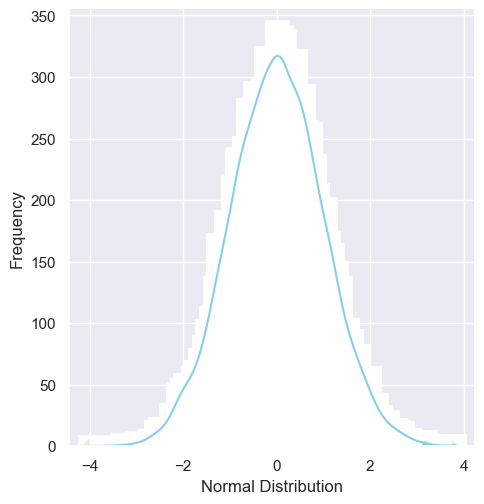

In [8]:
ax = sns.displot(data_normal,
                 bins=100,
                 kde=True,
                 color='skyblue',
                 linewidth=15,
                 alpha=1
                )

ax.set(xlabel='Normal Distribution', ylabel='Frequency')

# Gamma Distribution

In [9]:
from scipy.stats import gamma
data_gamma = gamma.rvs(a=5, size=10000)

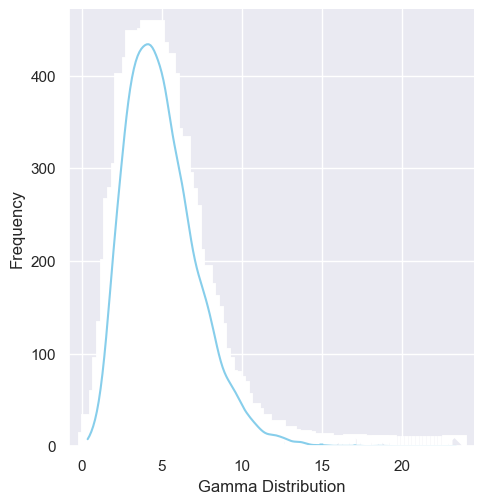

In [10]:
ax = sns.displot(data_gamma,
                 bins=100,
                 kde=True,
                 color='skyblue',
                 linewidth=15,
                 alpha=1
                )

ax.set(xlabel='Gamma Distribution', ylabel='Frequency')

# Exponential Distribution

In [11]:
from scipy.stats import expon
data_expon = expon.rvs(scale=1, loc=0, size=10000)

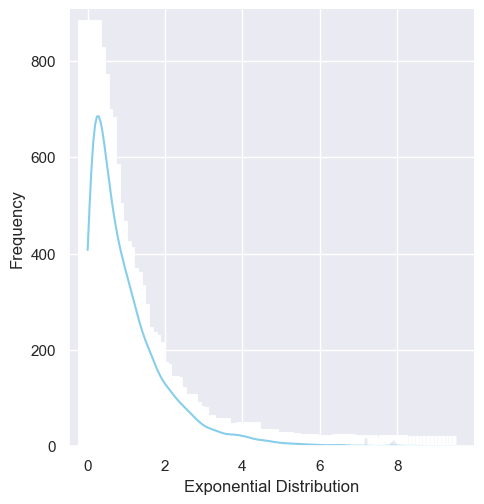

In [12]:
ax = sns.displot(data_expon,
                 bins=100,
                 kde=True,
                 color='skyblue',
                 linewidth=15,
                 alpha=1
                )

ax.set(xlabel='Exponential Distribution', ylabel='Frequency')

# Poisson Distribution

In [13]:
from scipy.stats import poisson
data_poisson = poisson.rvs(mu=3, size=10000)

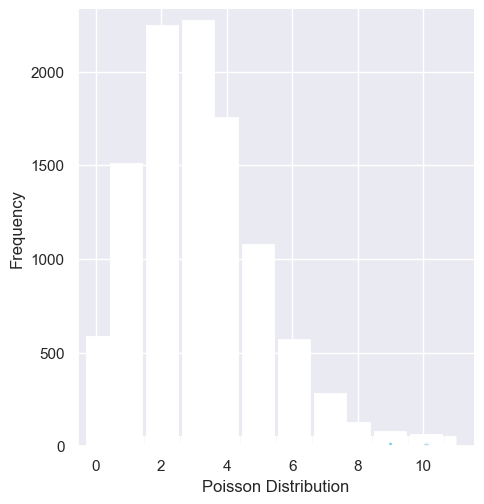

In [14]:
ax = sns.displot(data_poisson,
                 bins=30,
                 kde=False,
                 color='skyblue',
                 linewidth=15,
                 alpha=1
                )

ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

# Binomial Distribution

In [15]:
from scipy.stats import binom
data_binom = binom.rvs(n=10, p=0.8, size=10000)

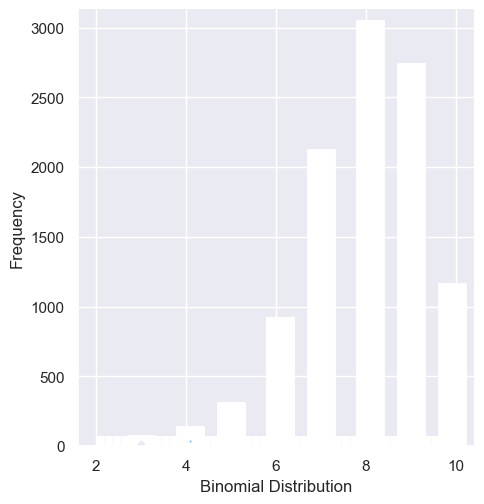

In [16]:
ax = sns.displot(data_binom,
                 kde=False,
                 color='skyblue',
                 linewidth=15,
                 alpha=1
                )

ax.set(xlabel='Binomial Distribution', ylabel='Frequency')

# Bernoulli Distribution

In [17]:
from scipy.stats import bernoulli
data_bern = bernoulli.rvs(size=10000, p=0.6)

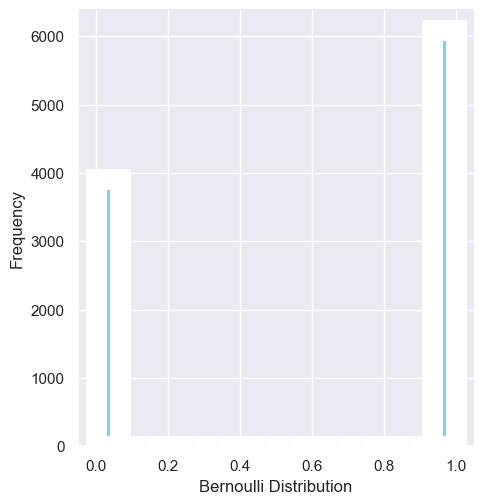

In [18]:
ax = sns.displot(data_bern,
                 kde=False,
                 color='skyblue',
                 linewidth=15,
                 alpha=1
                )

ax.set(xlabel='Bernoulli Distribution', ylabel='Frequency')

# Confidence Interval

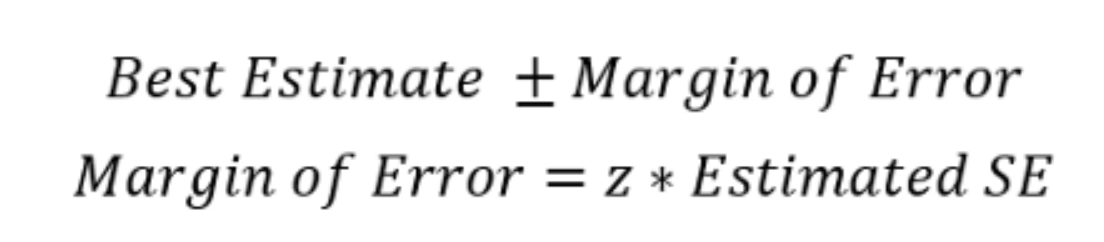

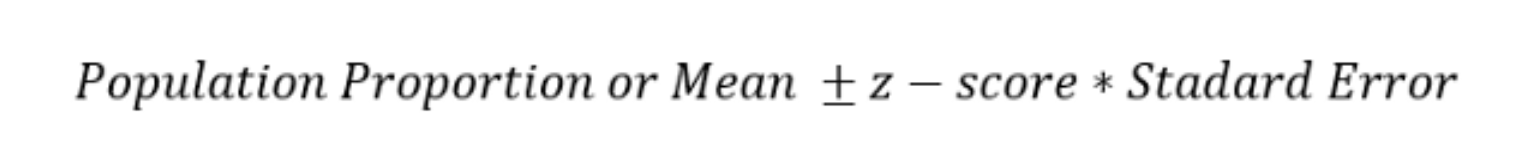
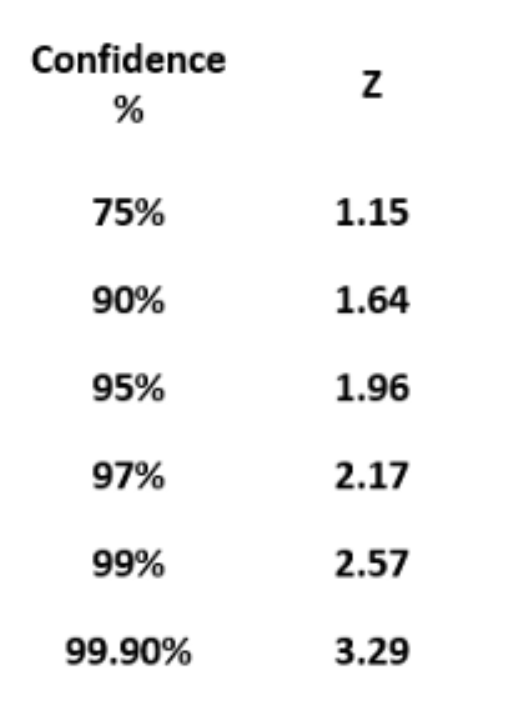

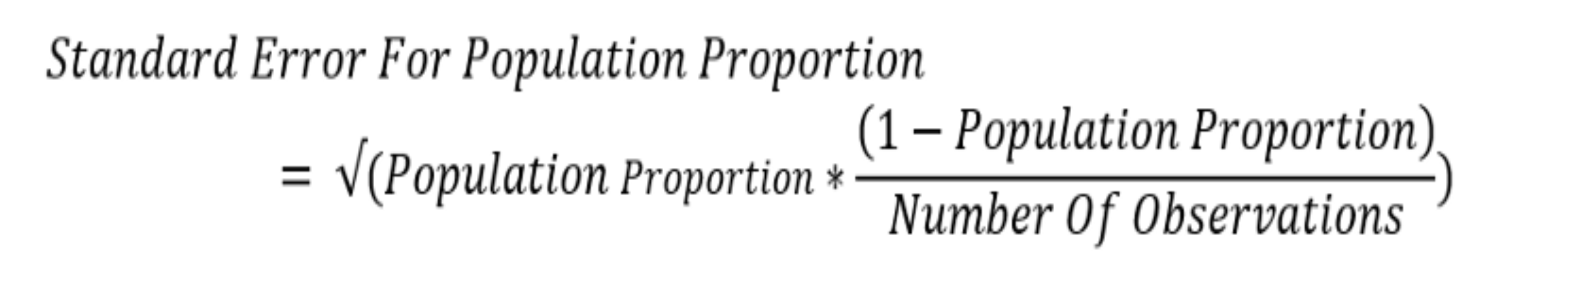

In [ ]:
############

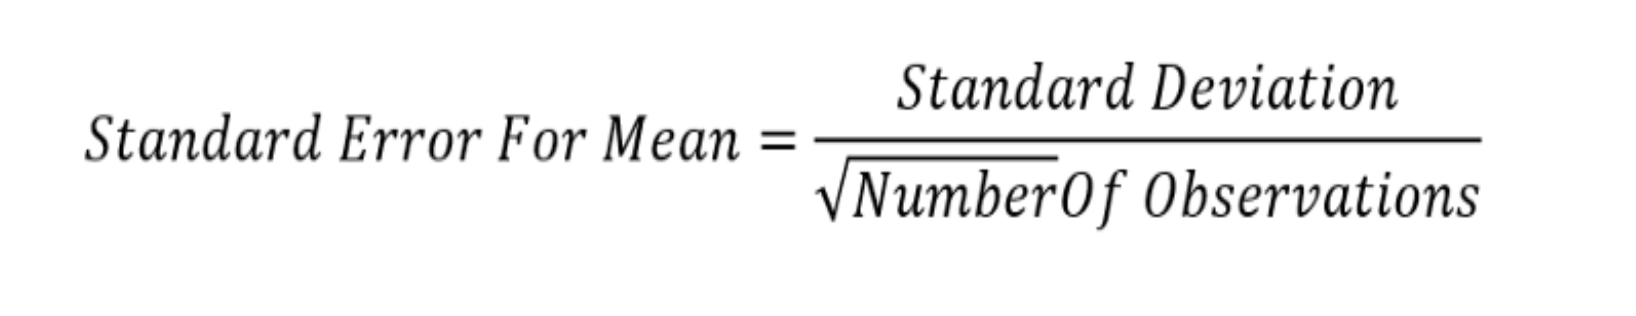

# CI for the Population Proportion

import pandas as pd
import numpy as np

prefix = '/Users/melawai.it/'
path = prefix + 'Documents/Work/Hacktiv8/PYTN-KS17/Sesi 10/heart.csv'

In [20]:
df = pd.read_csv(path)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [21]:
df['Sex1'] = df.sex.replace({1 : 'Male', 0: 'Female'})

In [22]:
dx = df[['target', 'Sex1']].dropna()

In [23]:
pd.crosstab(dx.target, dx.Sex1)

Sex1,Female,Male
target,,
0,86,413
1,226,300


In [24]:
p_fm = 226 / (86+226)
p_fm

0.7243589743589743

In [25]:
n = 86+226
n

312

In [26]:
se_female = np.sqrt(p_fm * (1- p_fm) / n)
se_female

0.02529714756803247

In [27]:
z_score = 1.96

lcb = p_fm - z_score * se_female # lower limit
ucb = p_fm + z_score * se_female # lower limit

lcb, ucb

(0.6747765651256307, 0.773941383592318)

In [29]:
import statsmodels.api as sm

In [30]:
sm.stats.proportion_confint(n*p_fm, n)

(0.6747774762140357, 0.773940472503913)

## Calculation of CI of Mean

In [31]:
df.groupby('Sex1').agg({'chol' : [np.mean, np.std, np.size]})

chol                
              mean        std size
Sex1                              
Female  261.455128  64.466781  312
Male    239.237027  43.155535  713

In [32]:
mean_fe = 261.45
sd = 64.4
n = 312
z = 1.96

In [33]:
se = sd / np.sqrt(n)
se

3.6459320499455985

In [34]:
lcb = mean_fe - z*se
ucb = mean_fe + z*se

lcb, ucb

(254.3039731821066, 268.59602681789335)

## Other Example of Confidence Interval

In [36]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np
import random
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(rc={'figure.figsize': (13,7.5)})
sns.set_context('talk')

In [37]:
np.random.seed(42)

nd_male_pounds = np.random.normal(loc=181, scale=24, size=6000)
nd_female_pounds = np.random.normal(loc=132, scale=22, size=6500)

all_mass_value = np.concatenate((nd_male_pounds,nd_female_pounds), axis=0)

df_mass = pd.DataFrame(data={
    'us_people_mass_pounds' : all_mass_value
})
df_mass

,us_people_mass_pounds
0,192.921140
1,177.681657
2,196.544525
3,217.552717
4,175.380319
...,...
12495,120.060669
12496,152.223744
12497,148.408843
12498,127.938558


## Viewin Distribution of U.S. People's Mass

Text(0.5, 1.015, "Ditribution of U.S. People's Mass")

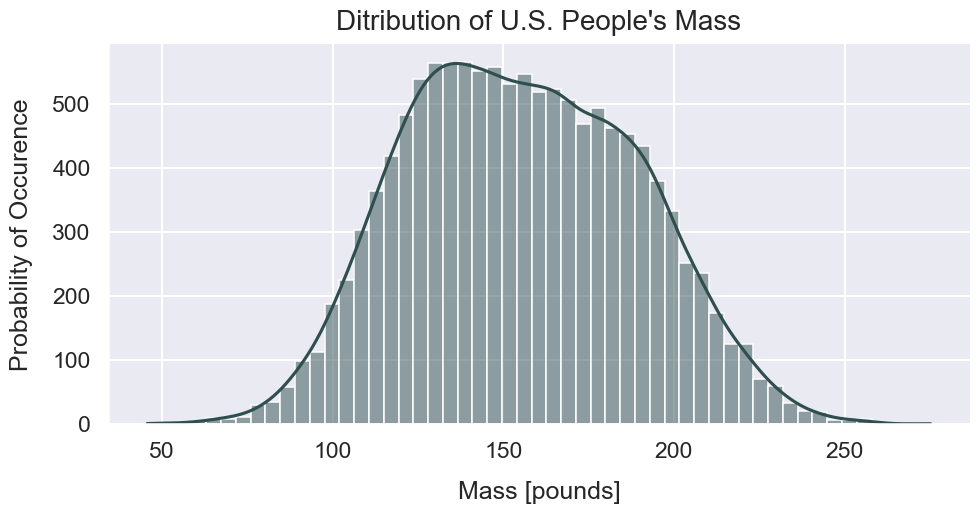

In [40]:
sns.displot(df_mass['us_people_mass_pounds'],
            color='darkslategrey',
            kde=True,
            aspect=2
            )
plt.xlabel('Mass [pounds]', labelpad=14)
plt.ylabel('Probability of Occurence', labelpad=14)
plt.title("Ditribution of U.S. People's Mass", y=1.015, fontsize=20)

In [41]:
pop_mean_mass = df_mass['us_people_mass_pounds'].mean()
pop_mean_mass

155.42328059423372

In [42]:
pop_std_mass = df_mass['us_people_mass_pounds'].std()
pop_std_mass

33.585190883958624

In [43]:
sample_means = []
n = 25

for sample in range(300):
    sample_values = np.random.choice(a=df_mass['us_people_mass_pounds'], size=n)
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)
    
sample_means

[152.35584985425828,
 163.80123733357277,
 151.9525590369234,
 162.78712648974727,
 165.06412049777543,
 159.6484207192931,
 147.41134120623008,
 161.51909781978588,
 152.87520628677777,
 171.91019849141284,
 148.37734430336067,
 158.86030838662475,
 161.48460294918655,
 155.54760339560113,
 157.10981541273696,
 149.11134996222847,
 152.37225849083654,
 155.56720357222636,
 151.9599212304467,
 165.33386047399378,
 155.49440070713064,
 148.09006279252316,
 150.94722820436434,
 161.89641449070317,
 152.17924867375555,
 153.29681304286726,
 168.34230894780515,
 150.1596131822321,
 148.08790733015783,
 152.0707118184942,
 151.46361937331528,
 157.5792473547189,
 152.50268745864958,
 158.1914704310815,
 146.75117833343856,
 157.0241233901806,
 156.13865920211546,
 152.58624877823505,
 168.809689653409,
 155.3272971405736,
 152.89371414452356,
 142.96704958963252,
 163.55533971384514,
 154.87270377355918,
 168.90344674104483,
 156.10632652940293,
 153.59945185861577,
 149.95977840663403,
 15

Text(27.819444444444443, 0.5, 'Frequency of Occurence')

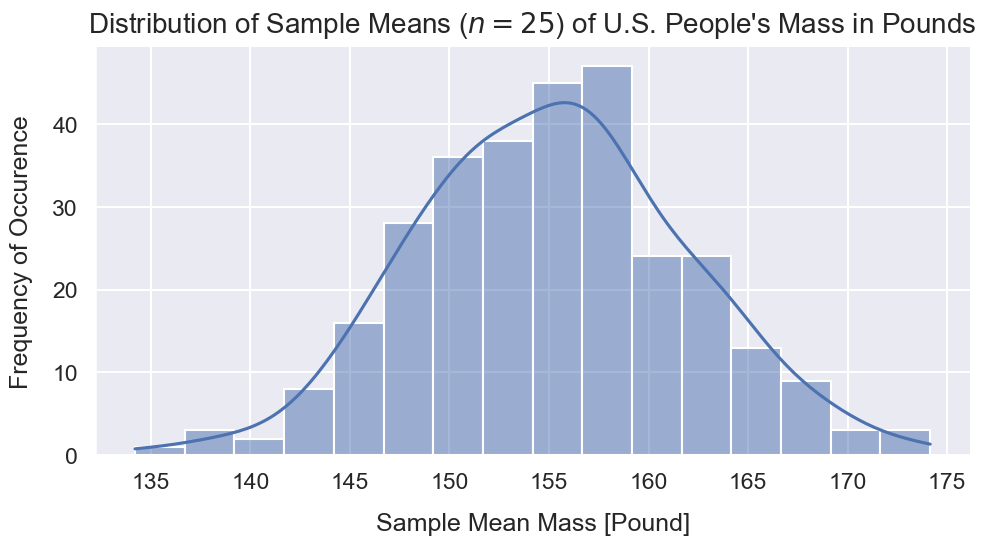

In [44]:
sns.displot(sample_means, aspect=2, kde=True)
plt.title("Distribution of Sample Means ($n=25$) of U.S. People's Mass in Pounds", y=1.015, fontsize=20)
plt.xlabel('Sample Mean Mass [Pound]', labelpad=14)
plt.ylabel('Frequency of Occurence', labelpad=14)

## Calculate Sampling Distribution Summary Statistics

In [45]:
median_sm = np.median(sample_means)
median_sm

155.3008268518431

In [46]:
mean_sm = np.mean(sample_means)
mean_sm

155.12418330193915

In [47]:
pop_mean_mass

155.42328059423372

In [48]:
std_sm = np.std(sample_means)
std_sm

6.734407481483423

## Equation for Standard Deviation of Sampling Distribution

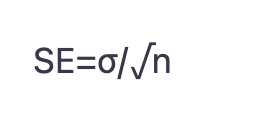

In [49]:
standard_error = pop_std_mass / np.sqrt(n)
standard_error

6.717038176791725

## Critical Z-Scores

In [50]:
tail = 1 - stats.norm.cdf(1.96)
tail

0.024997895148220484

In [51]:
lower_95perc = mean_sm - 1.96*standard_error
upper_95perc = mean_sm + 1.96*standard_error

In [52]:
lower_95perc, upper_95perc

(141.95878847542738, 168.28957812845093)

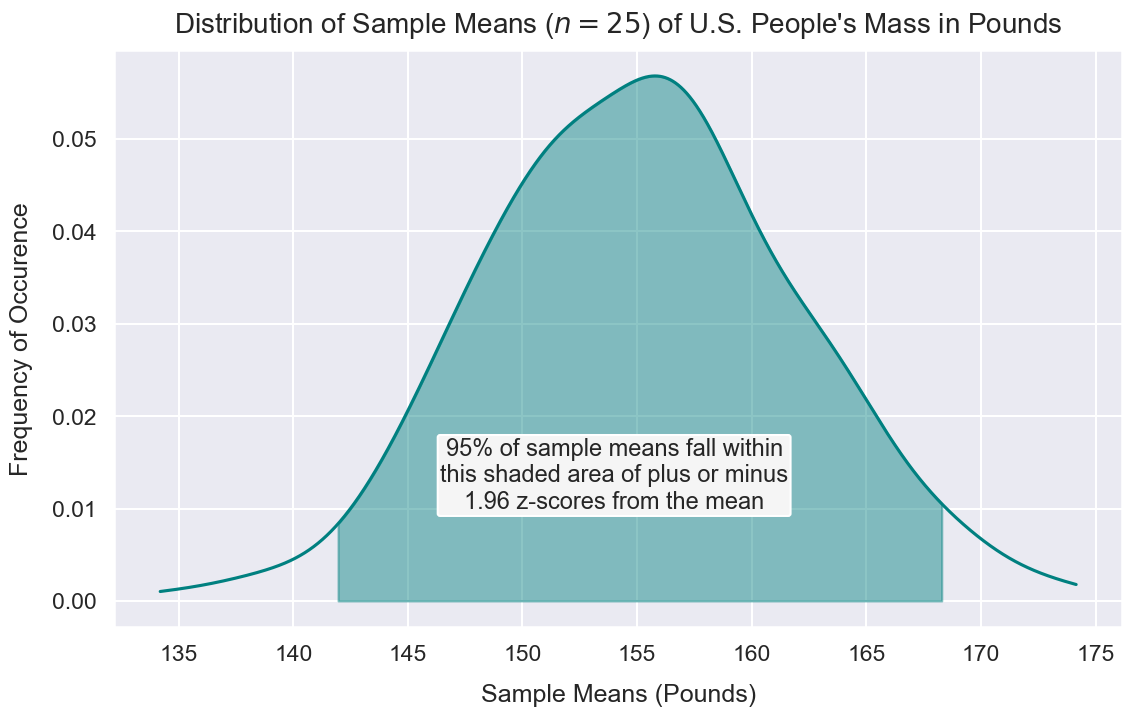

In [53]:
kde = stats.gaussian_kde(sample_means)

pos = np.linspace(np.min(sample_means), np.max(sample_means), 10000)
plt.plot(pos, kde(pos), color='teal')

shade = np.linspace(lower_95perc, upper_95perc, 300)
plt.fill_between(shade, kde(shade), alpha=.45, color='teal')

plt.text(s='95% of sample means fall within\nthis shaded area of plus or minus\n1.96 z-scores from the mean',
         x=154,
         y=.01,
         horizontalalignment='center', 
         fontsize=17,
         bbox=dict(facecolor='whitesmoke', boxstyle='round, pad=.1')
        )

plt.title("Distribution of Sample Means ($n=25$) of U.S. People's Mass in Pounds",
          y=1.015,
          fontsize=20
         )

plt.xlabel('Sample Means (Pounds)', labelpad=14)
plt.ylabel('Frequency of Occurence', labelpad=14)

plt.show()

# Hypothesis Testing

## One Population Proportion

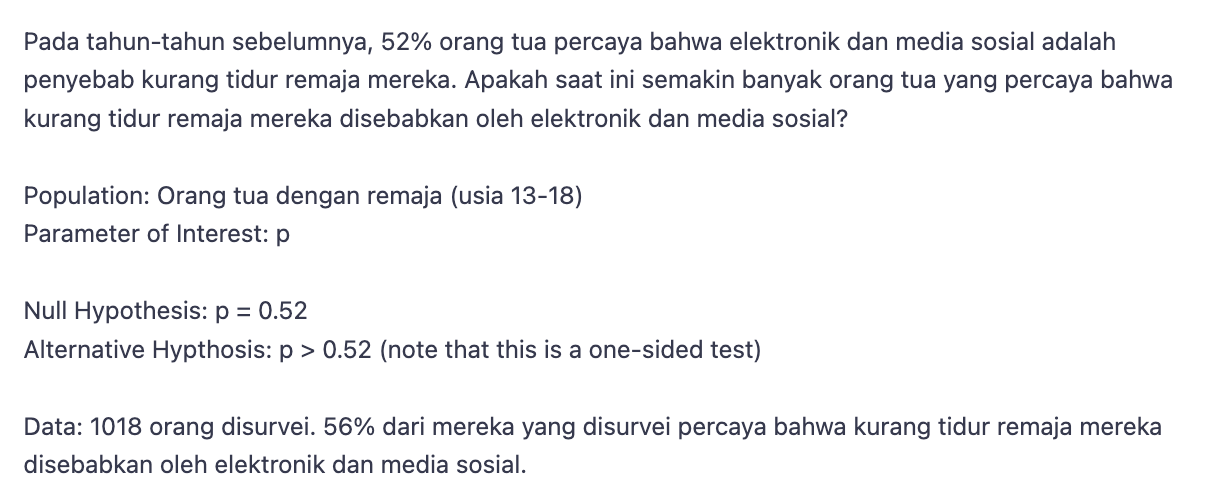

In [1]:
# proportion_ztest()
n = 1018 # banyaknya data
pnull = .52
phat = .56

In [2]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
sm.stats.proportions_ztest(phat * n, n, pnull, alternative = 'larger')

(2.571067795759113, 0.005069273865860533)

## Difference in Population Means

In [5]:
path = '/Users/melawai.it/Documents/Work/Hacktiv8/PYTN-KS17/Sesi 10/nhanes_2015_2016.csv'

In [6]:
da = pd.read_csv(path)
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [7]:
females = da[da["RIAGENDR"]==2] # data perempuan
males = da[da["RIAGENDR"]==1] #data laki-laki

In [8]:
# Perempuan
n1 = len(females) # banyak populasi
mu1 = females['BMXBMI'].mean() # Rata rata body mass index
sd1 = females['BMXBMI'].std() # standar deviasi BMI

In [11]:
(n1, mu1, sd1)

(2976, 29.93994565217392, 7.75331880954568)

In [10]:
# Laki-laki
n2 = len(males) # banyak populasi
mu2 = males['BMXBMI'].mean() # Rata rata body mass index
sd2 = males['BMXBMI'].std() # standar deviasi BMI

In [13]:
(n2, mu2, sd2)

(2759, 28.778072111846942, 6.252567616801485)

In [14]:
sm.stats.ztest(females['BMXBMI'].dropna(), males['BMXBMI'].dropna(), alternative='two-sided')

(6.1755933531383205, 6.591544431126401e-10)

# Hypothesis Testing for One Proportion

In [15]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats.distributions as dist

In [16]:
prefix = '/Users/melawai.it/'
path = prefix + 'Documents/Work/Hacktiv8/PYTN-KS17/Sesi 10/heart.csv'

In [17]:
df = pd.read_csv(path)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Step 1
define the null hypothesis
H0 : p0 = 0.42
Ha : p > 0.42

## Step 2
Calculate the proportion of having heart disease

In [18]:
p_us = len(df[df['target']==1]) / len(df)
p_us

0.5131707317073171

## Step
test Statistic
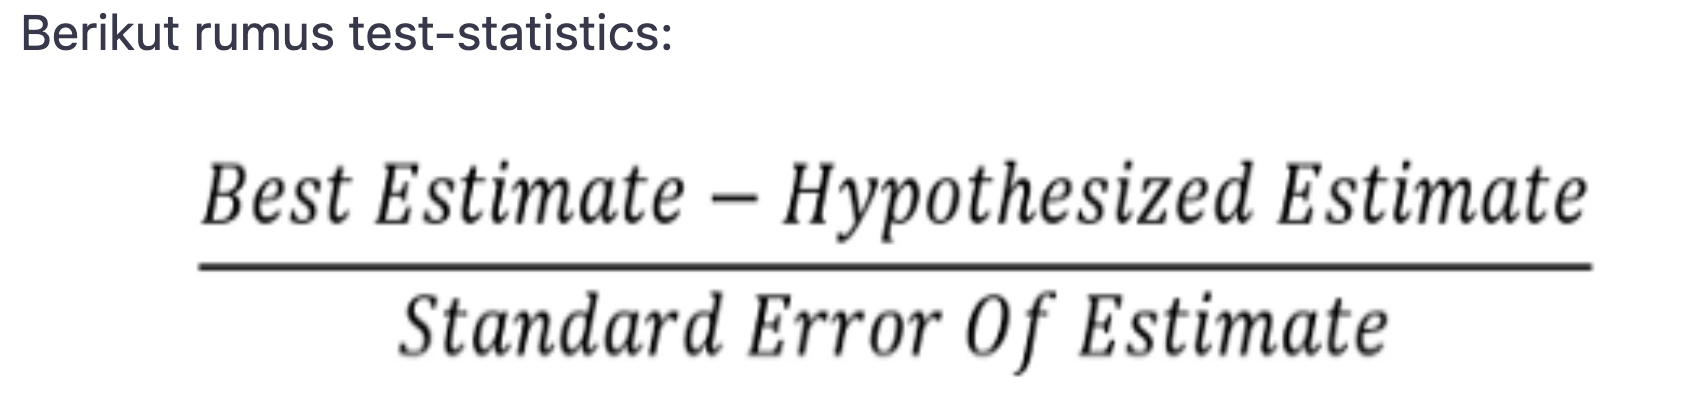
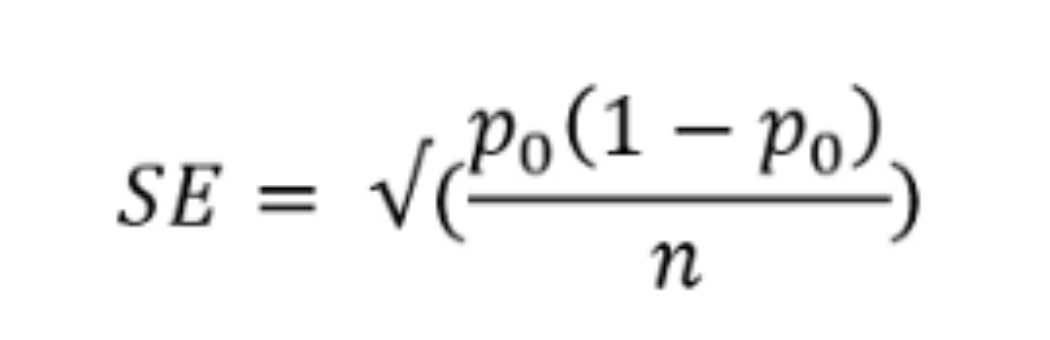

In [19]:
se = np.sqrt(.42 * (1 - .42) / len(df)) # menghitung Standard Error
se

0.015416177755376521

In [20]:
be = p_us # best estimate

he = .42 # po/ null hypothesis

# Menighitung Test Statistik
test_stat = (be - he) / se
test_stat

6.04369858636477

## Step 4 : Calculate the p-value

In [21]:
pvalue = 2*dist.norm.cdf(-np.abs(test_stat))

In [22]:
pvalue

1.5062078087269162e-09

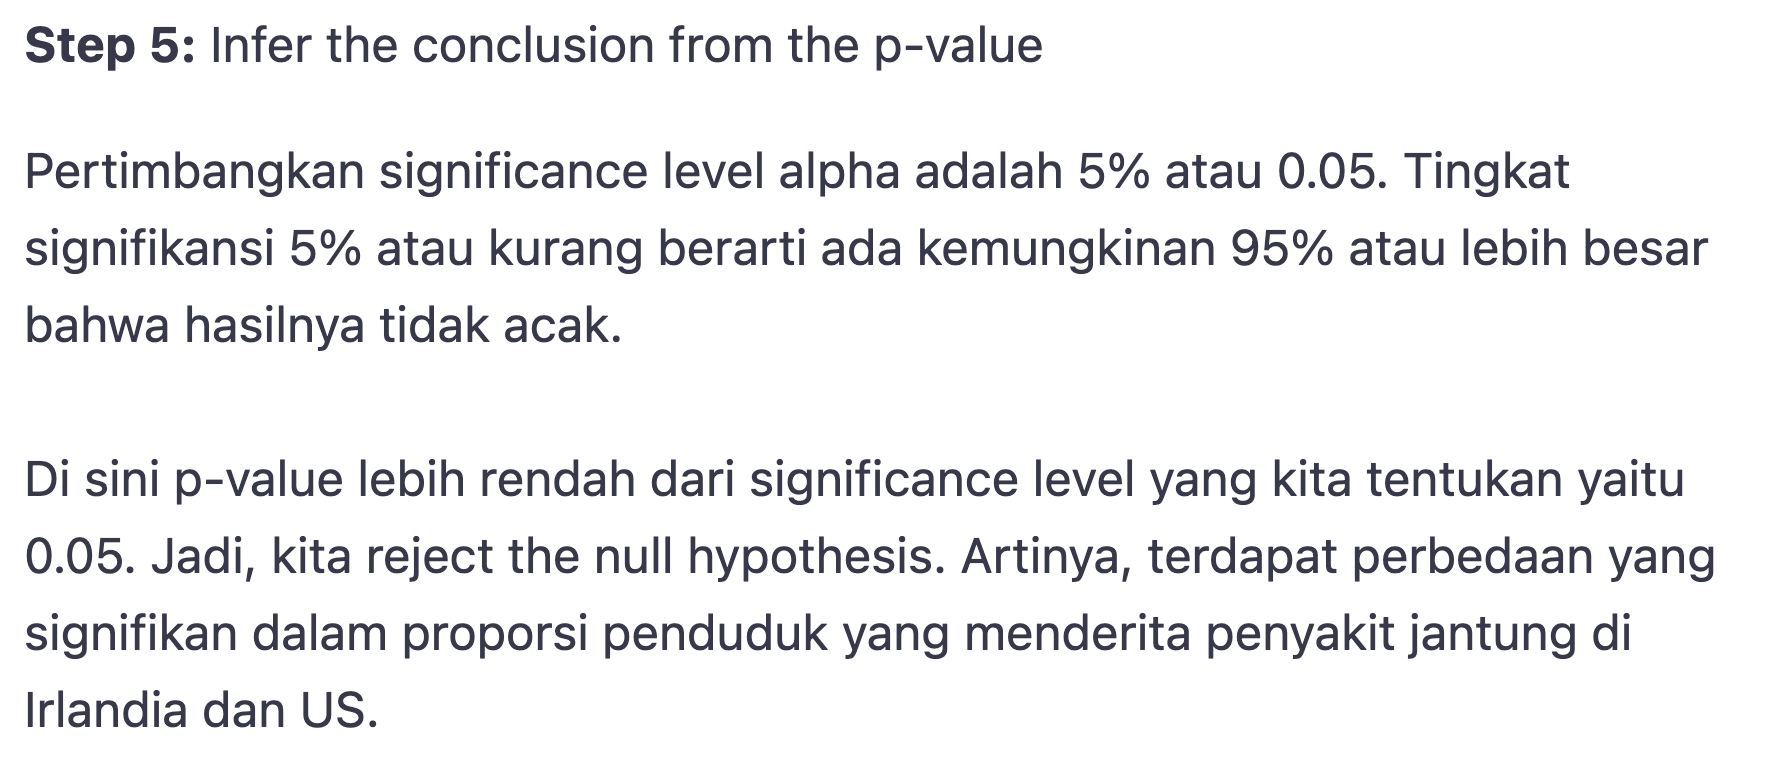